# Lab 4: Working with 'real' data
Noah Kim
Section AC

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
matplotlib.rc('font', size=22)
matplotlib.rc('figure', figsize=(18, 10))

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

## Problem 1 
We are looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')
hf.keys()
data = np.array(hf.get('data'))
hf.close()

For the purpose of my visualizations, I am going to be using the first 400000 rows of data.  The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts

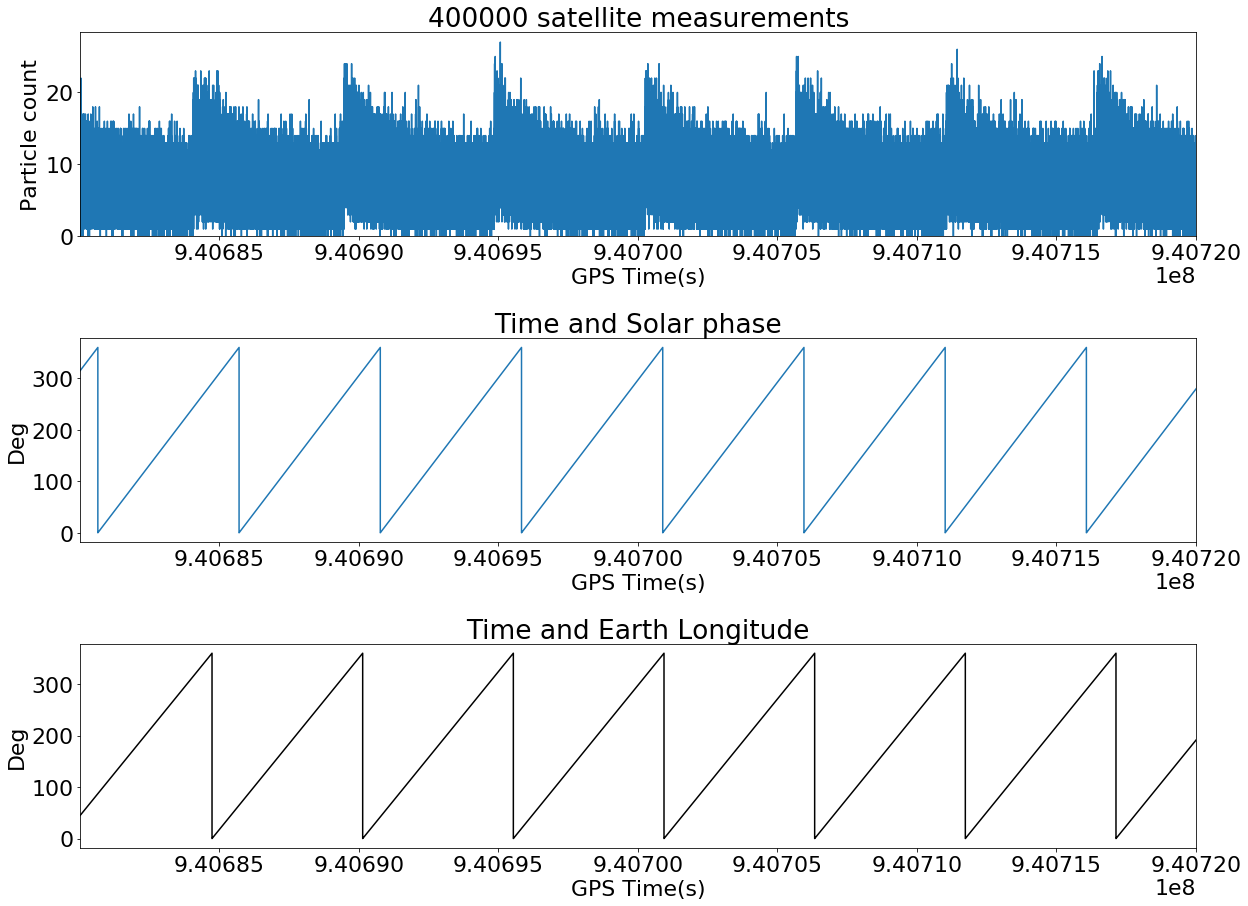

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
n = 400000
fig.subplots_adjust(hspace=0.5)
ax1.plot(data[0][0:n], data[3][0:n]);
ax1.set_xlim(data[0][0], data[0][n])
ax1.set_ylim(0, None);
ax1.set_title('400000 satellite measurements')
ax1.set_xlabel('GPS Time(s)');
ax1.set_ylabel('Particle count');

ax2.plot(data[0][0:n], data[1][0:n]);
ax2.set_title('Time and Solar phase')
ax2.set_xlabel('GPS Time(s)');
ax2.set_xlim(data[0][0], data[0][n])
ax2.set_ylabel('Deg')

ax3.plot(data[0][0:n], data[2][0:n],'k');
ax3.set_title('Time and Earth Longitude')
ax3.set_xlabel('GPS Time(s)');
ax3.set_xlim(data[0][0], data[0][n])
ax3.set_ylabel('Deg');

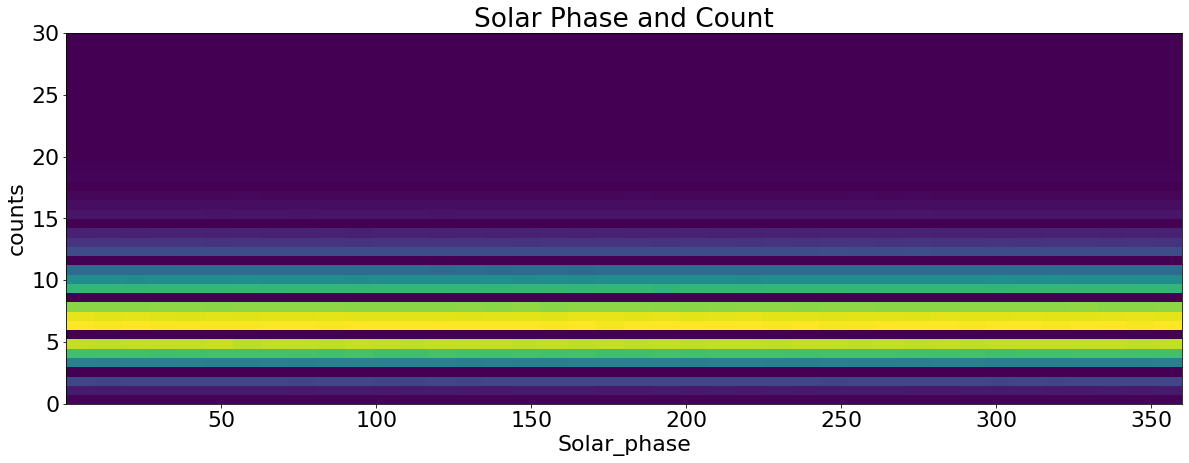

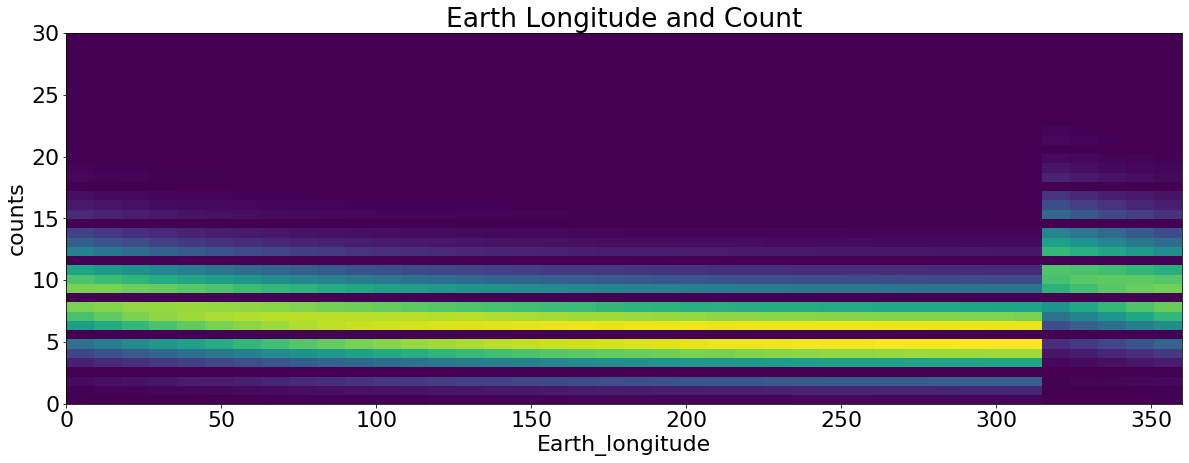

In [43]:
plt.subplot(2, 1, 1)
plt.xlabel('Solar_phase')
plt.ylabel('counts')
plt.hist2d(data[1], data[3], bins=(40, 40))
plt.title('Solar Phase and Count')
plt.show()
plt.subplot(2, 1, 2)
plt.xlabel('Earth_longitude')
plt.ylabel('counts')
plt.hist2d(data[2], data[3], bins=(40, 40))
plt.title('Earth Longitude and Count')
plt.show()

2) The background is not consistent across the dataset. Find and describe as accurately as you can how the background changes.

Both the solar phase and earth longitude have inconsistencies in their oscillatory behavior. This data is sampled using 1 in 1 million data points to aid in processing time. The solar phase and earth longitude should be relatively unaffected by this sampling method because of the consistency of the values, but the solar phase and the earth longitudinal values and trending upwards, and then abruptly spike down. Also observing the period of the solar phase, it is shown to repeat every 0.05 * 10^8 gps seconds, when the expected period should be 90 minutes. This is more due to the sampling method of taking 1 in every million data points. If we were to try to plot all of the data it would be near impossible to tell what the period is because the data would take the shape of a square(really compressed).

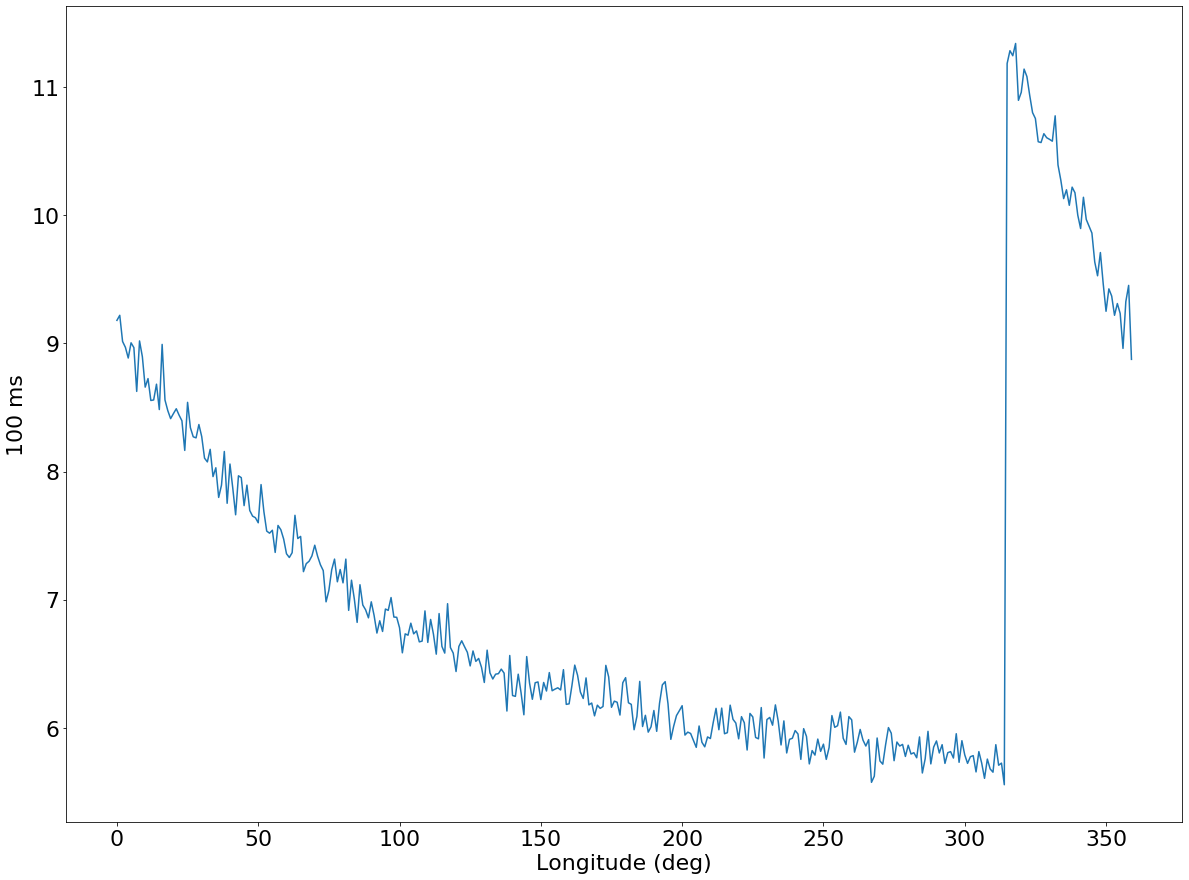

7.089283947408948

In [53]:
counts = data[3]
means = [np.mean(counts[data[2]==i]) for i in np.arange(360)]
plt.plot(np.arange(360), means)
plt.xlabel("Longitude (deg)")
plt.ylabel("100 ms")
plt.show()
dict(zip(np.arange(360), means))
np.mean(means)

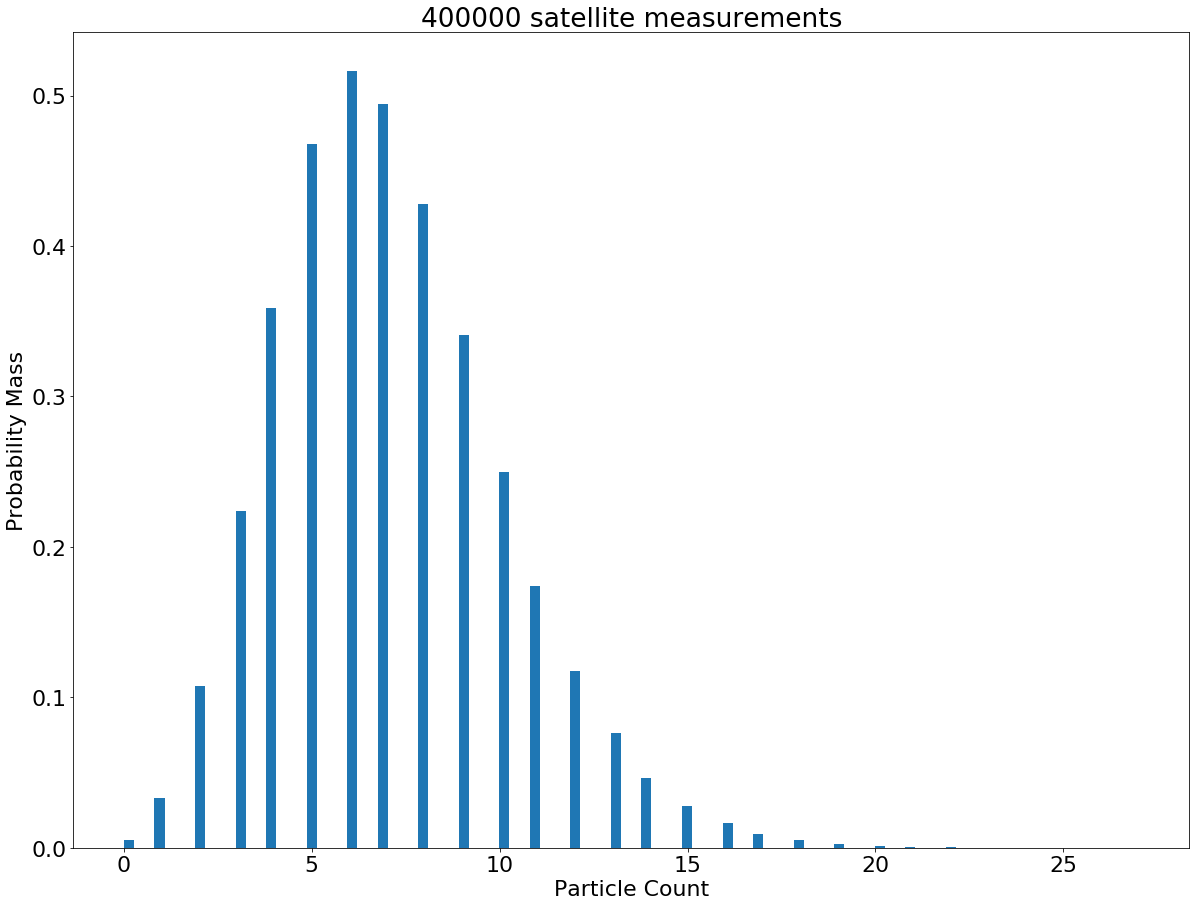

In [28]:
plt.hist(data[3][0:n], bins=100, density= True);
plt.title('400000 satellite measurements')
plt.xlabel('Particle Count');
plt.ylabel('Probability Mass');

After finding the mean of the counts data, I plotted the poisson with the mean of counts and plotted it over the Satellite data.

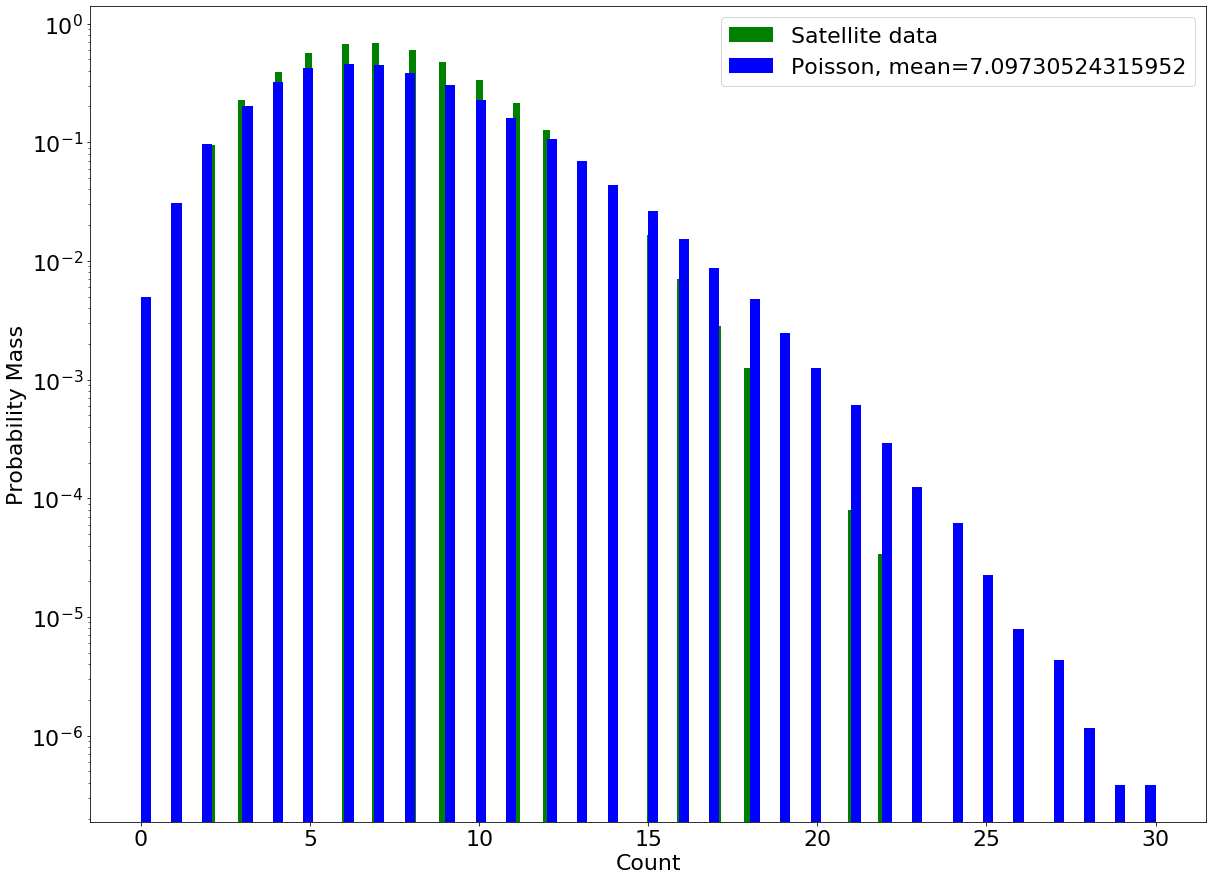

In [48]:
mu = np.mean(data[3])
pmf = stats.poisson(mu).rvs(n)
plt.yscale('log');
plt.xlabel('Count')
plt.ylabel('Probability Mass')
plt.hist(pmf, 100, density=True, color='g')
plt.hist(data[3], 100, density=True, color='b')
plt.legend(['Satellite data', f'Poisson, mean={mu}']);

The predicted model here is shown in turquoise and it represents a poisson distribution centered around the average of our data - 7.1, with the same size of 2.6 million data points. The black displays the actual average particle count distribution. This was all plotted on a log plot in order to see the distinctions between the data and our model to a high degree of accuracy. As we can see here, the poisson distribution slightly overpredicts the data around the mean, but falls off significantly faster than our actual data. So near the edges it significantly underpredicts the actual particle count being observed.

I believe that a poisson distribution model does a decent job of approximating the background of our distribution because it is relatively consistent with the data around the mean, but as we move towards the edges of the distribution, the difference between the actual data and the model grows. This is indicative of a 5-sigma event occuring(e.g. seeing a gamma ray burst.)

In [38]:
mu = np.mean(data[3])
print(mu)

7.09730524315952


In [ ]:
prob = 1- stats.norm.cdf(5)
stats.poisson.ppf(prob, mean)

faintest star